# Labolatorium 1

### Autorzy:
Patryk Klatka \
Wojciech Łoboda

## Import bibliotek oraz ich konfiguracja

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Rekurencyjne mnożenie macierzy metodą Binet'a

Rekurencyjne mnożenie macierzy metodą Binet'a to nic innego jak klasyczne mnożenie macierzy, lecz z wykorzystaniem rekurencji. W tym przypadku rekurencja polega na podziale macierzy na mniejsze podmacierze, aż do uzyskania macierzy 1x1, która jest mnożona przez samą siebie. Następnie wyniki są sumowane w odpowiedni sposób, aby otrzymać wynik końcowy. Pseudokod algorytmu wygląda następująco:

```python
binet(A, B)
    n = A.rows
    C = new Matrix(n, n)
    if n == 1
        C[0][0] = A[0][0] * B[0][0]
    else
        C[0][0] = binet(A[0][0], B[0][0]) + binet(A[0][1], B[1][0])
        C[0][1] = binet(A[0][0], B[0][1]) + binet(A[0][1], B[1][1])
        C[1][0] = binet(A[1][0], B[0][0]) + binet(A[1][1], B[1][0])
        C[1][1] = binet(A[1][0], B[0][1]) + binet(A[1][1], B[1][1])
    return C
```

Najbardziej istotnym fragmentem powyższego algorytmu jest kod po klauzuli `else`: ten algorytm wymaga 8 mnożeń i 4 dodawań dla każdego wywołania rekurencyjnego. Biorąc tą obserwację pod uwagę, możemy śmiało wywnioskować, że czas wykonywania algorytmu wyniesie:

$$T(n) \le 8*T(n/2) + cn^2, T(1) = 1 $$

gdzie $cn^2$ jest czasem potrzebnym na dodanie dwóch macierzy o rozmiarze $n \times n$. Można rozwiązać ten wzór rekurencyjny za pomocą analizy drzewa rekurencyjnego (tak jak np. [tutaj](https://www.cs.cmu.edu/afs/cs/academic/class/15750-s17/ScribeNotes/lecture1.pdf)) i zauważyć, że $T(n) = O(n^3)$.

In [91]:
def binet(A,B):
    operation_count = 0
    n = A.shape[0]
    if n == 1:
        operation_count += 1
        return A * B, operation_count
    else:
        A11 = A[:n//2, :n//2]
        A12 = A[:n//2, n//2:]
        A21 = A[n//2:, :n//2]
        A22 = A[n//2:, n//2:]
        B11 = B[:n//2, :n//2]
        B12 = B[:n//2, n//2:]
        B21 = B[n//2:, :n//2]
        B22 = B[n//2:, n//2:]
        P1, c1 = binet(A11, B11)
        P2, c2 = binet(A12, B21)
        P3, c3 = binet(A11, B12)
        P4, c4 = binet(A12, B22)
        P5, c5 = binet(A21, B11)
        P6, c6 = binet(A22, B21)
        P7, c7 = binet(A21, B12)
        P8, c8 = binet(A22, B22)
        C11 = P1 + P2
        C12 = P3 + P4
        C21 = P5 + P6
        C22 = P7 + P8
        operation_count += c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8
        C = np.zeros((n, n))
        C[:n//2, :n//2] = C11
        C[:n//2, n//2:] = C12
        C[n//2:, :n//2] = C21
        C[n//2:, n//2:] = C22
        return C, operation_count

### Test poprawności algorytmu

In [92]:
test_matrix = np.array([
    [5,1,3,4],
    [0,1,8,5],
    [9,3,6,1],
    [7,3,9,2]
])

m1 = binet(test_matrix, test_matrix)[0]
m2 = test_matrix @ test_matrix
print(np.allclose(m1, m2))

True


## Rekurencyjne mnożenie macierzy metodą Strassena

Rekurencyjne mnożenie macierzy metodą Strassena jest podobne do mnożenia metodą Binet'a, lecz zamiast 8 mnożeń i 4 dodawań, potrzebuje 7 mnożeń i 18 dodawań. Pseudokod algorytmu wygląda następująco:

```python
strassen(A, B)
    n = A.rows
    C = new Matrix(n, n)
    if n == 1
        C[0][0] = A[0][0] * B[0][0]
    else
        A11 = A[0][0]
        A12 = A[0][1]
        A21 = A[1][0]
        A22 = A[1][1]
        B11 = B[0][0]
        B12 = B[0][1]
        B21 = B[1][0]
        B22 = B[1][1]
        P1 = strassen(A11, B12 - B22)
        P2 = strassen(A11 + A12, B22)
        P3 = strassen(A21 + A22, B11)
        P4 = strassen(A22, B21 - B11)
        P5 = strassen(A11 + A22, B11 + B22)
        P6 = strassen(A12 - A22, B21 + B22)
        P7 = strassen(A11 - A21, B11 + B12)
        C[0][0] = P5 + P4 - P2 + P6
        C[0][1] = P1 + P2
        C[1][0] = P3 + P4
        C[1][1] = P1 + P5 - P3 - P7
    return C
```

Analogicznie jak w poprzednim algorytmie, najważniejszy fragment kodu znajduje się po klauzuli `else`. Możemy zauważyć, że liczba mnożeń zmniejszyła się o jeden, natomiast liczba dodawań wzrosła do 18. W tym przypadku, czas wykonywania algorytmu wyniesie:
$$T(n) \le 7*T(n/2) + cn^2, T(1) = 1 $$

gdzie $cn^2$ jest czasem potrzebnym na dodanie dwóch macierzy o rozmiarze $n \times n$. Można rozwiązać ten wzór rekurencyjny tak samo jak w poprzednim przykładzie i oszacować, że $T(n) = O(n^{\log_{2}{7}}) = O(n^{2.807...})$.


In [93]:
def strassen(A, B):
    operation_count = 0
    n = A.shape[0]
    if n == 1:
        operation_count += 1
        return A * B, operation_count
    else:
        A11 = A[:n//2, :n//2]
        A12 = A[:n//2, n//2:]
        A21 = A[n//2:, :n//2]
        A22 = A[n//2:, n//2:]
        B11 = B[:n//2, :n//2]
        B12 = B[:n//2, n//2:]
        B21 = B[n//2:, :n//2]
        B22 = B[n//2:, n//2:]
        P1, c1 = strassen(A11+A22, B11+B22)
        P2, c2 = strassen(A21+A22, B11)
        P3, c3 = strassen(A11, B12-B22)
        P4, c4 = strassen(A22, B21-B11)
        P5, c5 = strassen(A11+A12, B22)
        P6, c6 = strassen(A21-A11, B11+B12)
        P7, c7 = strassen(A12-A22, B21+B22)
        C11 = P1 + P4 - P5 + P7
        C12 = P3 + P5
        C21 = P2 + P4
        C22 = P1 + P3 - P2 + P6
        operation_count += c1 + c2 + c3 + c4 + c5 + c6 + c7
        C = np.zeros((n, n))
        C[:n//2, :n//2] = C11
        C[:n//2, n//2:] = C12
        C[n//2:, :n//2] = C21
        C[n//2:, n//2:] = C22
        return C, operation_count

### Test poprawności algorytmu

In [94]:
test_matrix = np.array([
    [5,1,3,4],
    [0,1,8,5],
    [9,3,6,1],
    [7,3,9,2]
])

m1 = strassen(test_matrix, test_matrix)[0]
m2 = test_matrix @ test_matrix
print(np.allclose(m1, m2))

True


## Porównanie algorytmów rekurencyjnych

In [95]:
# Generate matrices
def generate_matrix(n):
    return np.random.uniform(0.00000001, 1, (n, n))

k = 7
test_matrices = [(generate_matrix(2**i), generate_matrix(2**i)) for i in range(2, k+1)]

### Porównanie czasów wykonania

In [96]:
def plot_execution_times(algorithm, test_matrices):
    execution_times = []
    for A, B in test_matrices:
        start_time = time.time()
        algorithm(A, B)
        end_time = time.time()
        execution_times.append(end_time - start_time)
    plt.title("Execution times for " + algorithm.__name__.title() + " algorithm")
    plt.xlabel("Matrix size")
    plt.ylabel("Time (s)")
    plt.plot([i for i in range(2,k+1)] ,execution_times, 'o-')
    plt.show()

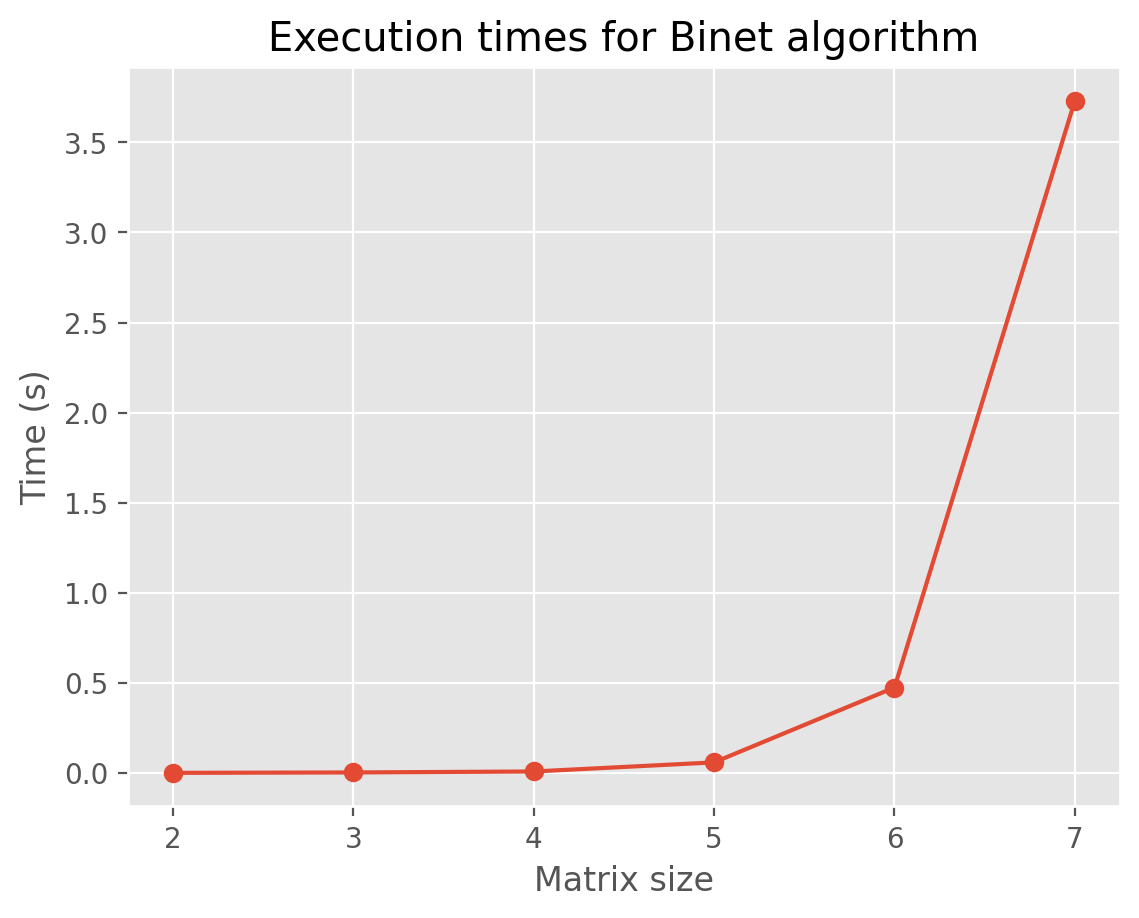

In [97]:
plot_execution_times(binet, test_matrices)

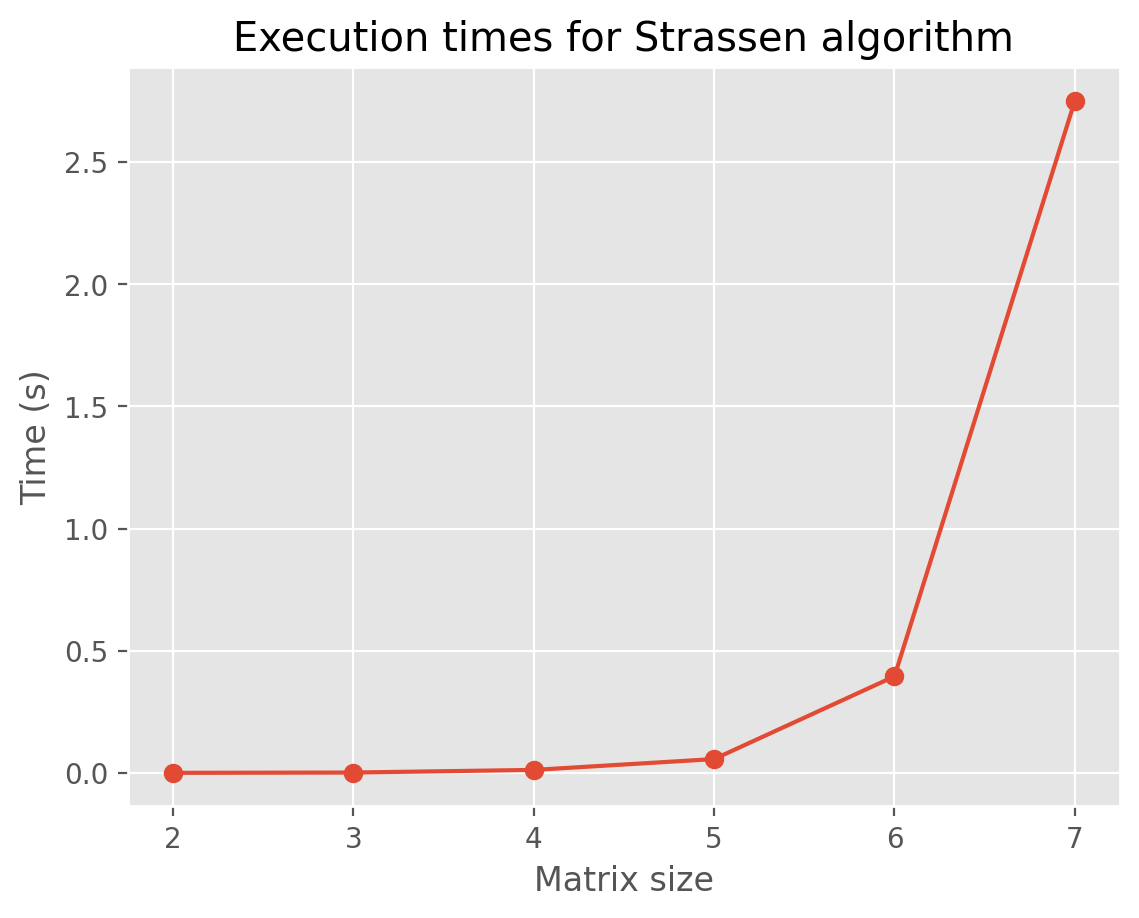

In [98]:
plot_execution_times(strassen, test_matrices)

### Porównanie liczby operacji zmienno-przecinkowych

In [99]:
def plot_flops(algorithm, test_matrices):
    flops = []
    for A, B in test_matrices:
        A, tmp_flops = algorithm(A, B)
        flops.append(tmp_flops)
    plt.title("Floating-point operations number for " + algorithm.__name__.title() + " algorithm")
    plt.xlabel("Matrix size")
    plt.ylabel("Floating-point operations number")
    plt.plot([i for i in range(2,k+1)] ,flops, 'o-')
    plt.show()

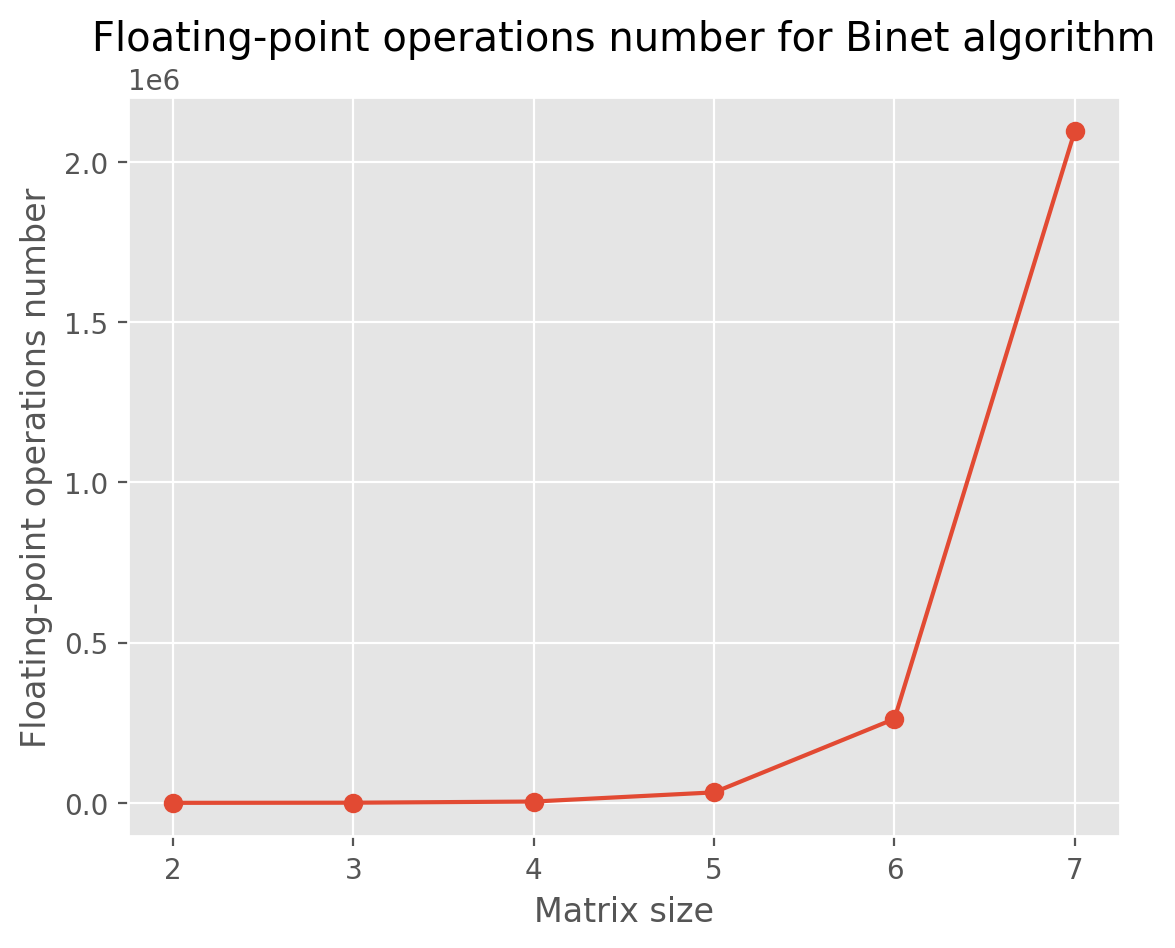

In [100]:
plot_flops(binet, test_matrices)

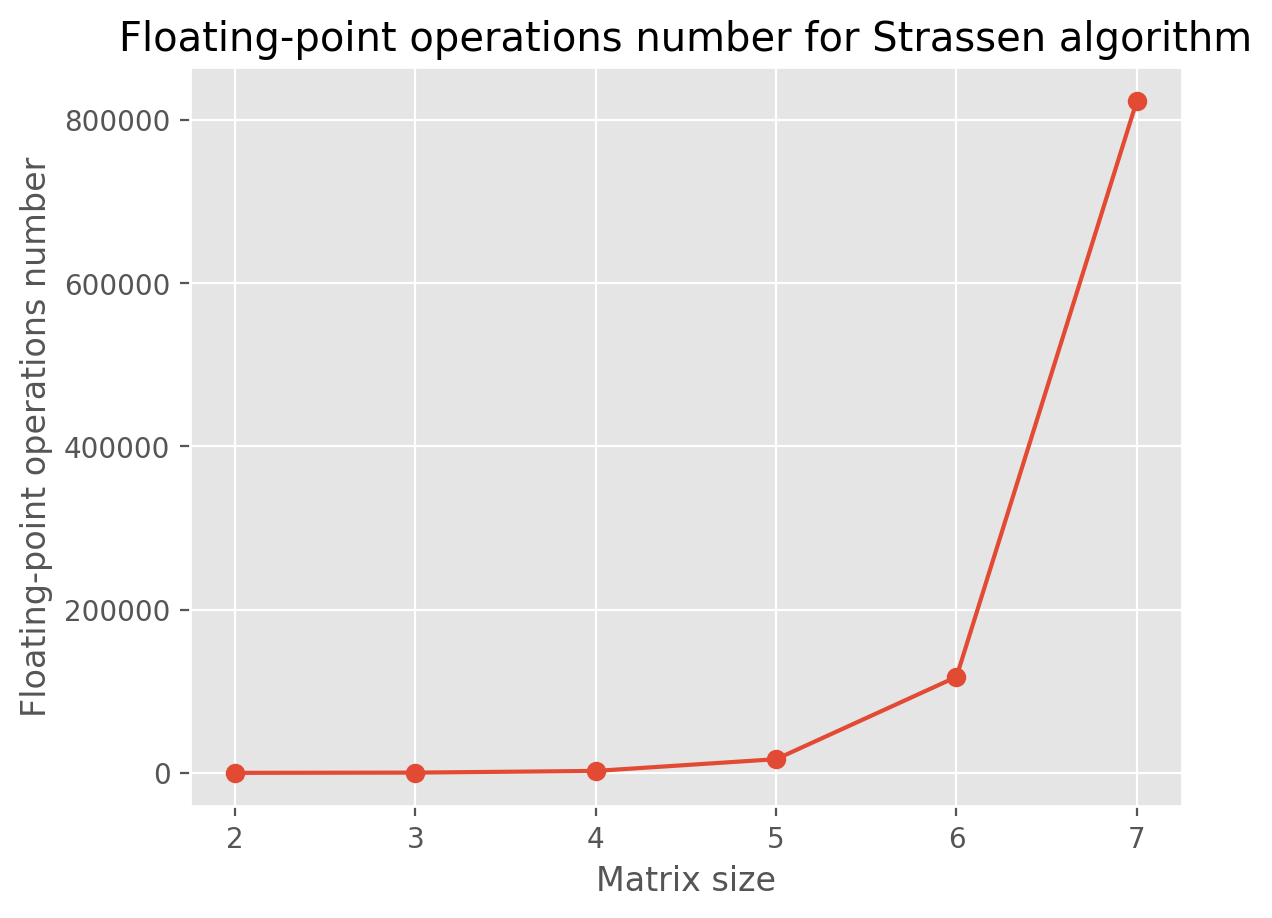

In [101]:
plot_flops(strassen, test_matrices)

## Mnożenie macierzy metodą znalezioną przez AlphaTensor

Źródło: https://www.deepmind.com/blog/discovering-novel-algorithms-with-alphatensor

Model AlphaTensor korzysta z przedstwienia operacji mnożenia macierzy o rozmiarach $N \times M$ i $M \times L$ w postaci pewnego tensora $T$
o rozmiarze $N^2\times M^2 \times L^2$ z wartosciami ze zbioru {0, 1}. Model stara się znaleść faktoryzacje pierwszego rzędu $T$ na $R$ faktorów $u, v, w$. Liczba $R$ wyznacza ilość operacji mnożenia zmiennoprzecinkowego potrzebnego do wyznaczenia iloczynu macierzy. Przykład działania znalezionego algorytmu dla 2 macierzy $2 \times 2$, $R = 7$ (algorytm Strassena):

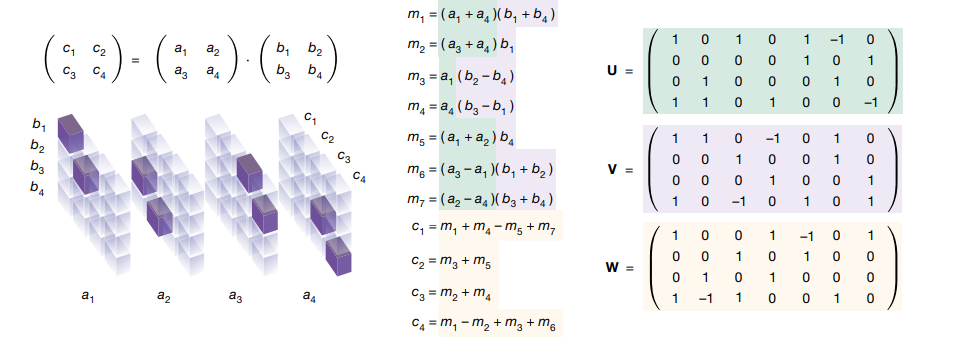

In [102]:
#loading dict with known factorizations for different matrix sizes from https://github.com/google-deepmind/alphatensor
filename = 'factorizations_r.npz'
with open(filename, 'rb') as f:
  factorizations = dict(np.load(f, allow_pickle=True))

print(factorizations.keys())

dict_keys(['2,2,2', '2,2,3', '2,2,4', '2,2,5', '2,2,6', '2,2,7', '2,2,8', '2,3,3', '2,3,4', '2,3,5', '2,4,4', '2,4,5', '2,5,5', '3,3,3', '3,3,4', '3,3,5', '3,4,4', '3,4,5', '3,4,11', '3,5,5', '3,5,9', '3,9,11', '4,4,4', '4,4,5', '4,5,5', '4,5,9', '4,5,10', '4,5,11', '4,9,10', '4,9,11', '4,11,11', '4,11,12', '5,5,5', '5,5,7', '5,7,9', '5,7,10', '5,7,11', '5,8,9', '5,8,10', '5,8,11', '5,9,9', '5,9,10', '5,9,11', '5,9,12', '6,7,9', '6,7,10', '6,7,11', '6,8,10', '6,8,11', '6,9,9', '6,9,10', '6,9,11', '7,7,9', '7,7,10', '7,7,11', '7,8,9', '7,8,10', '7,8,11', '7,8,12', '7,9,9', '7,9,10', '7,9,11', '7,9,12', '7,10,10', '7,10,11', '7,11,11', '8,8,10', '8,8,11', '8,9,10', '8,9,11', '8,9,12', '8,10,10', '8,10,11', '8,10,12', '8,11,11', '8,11,12', '9,9,9', '9,9,10', '9,9,11', '9,10,10', '9,10,11', '9,10,12', '9,11,11', '9,11,12', '10,10,10', '10,10,11', '10,10,12', '10,11,11', '10,11,12', '10,12,12', '11,11,11', '11,11,12', '11,12,12'])


In [103]:
def algorithm_from_factors(factors, n, m, k):
  factors = [factors[0].copy(), factors[1].copy(), factors[2].copy()]
  rank = factors[0].shape[-1]
  factors[0] = factors[0].reshape(n, m, rank)
  factors[1] = factors[1].reshape(m, k, rank)
  factors[2] = factors[2].reshape(k, n, rank)
  factors[2] = factors[2].transpose(1, 0, 2)

  def f(a, b):
    n = a.shape[0]
    m = a.shape[1]
    k = b.shape[1]

    result = [[0.0] * k for _ in range(n)]
    
    for alpha in range(rank):
      left = 0.0
      for i in range(n):
        for j in range(m):
          if factors[0][i, j, alpha] != 0:
            curr = factors[0][i, j, alpha] * a[i][j] 
            left += curr
      right = 0.0
      for i in range(m):
        for j in range(k):
          if factors[1][i, j, alpha] != 0:
            curr = factors[1][i, j, alpha] * b[i][j]
            right += curr
      matrix_product = left * right

      for i in range(n):
        for j in range(k):
          if factors[2][i, j, alpha] != 0:
            curr = factors[2][i, j, alpha] * matrix_product
            result[i][j] += curr
    return result
  return f

def alphatensor_matrix_mul(A, B):
  assert A.shape[1] == B.shape[0]
  n = A.shape[0]
  m = A.shape[1]
  k = B.shape[1]
  factors = factorizations[str(n) + ',' + str(m) + ',' + str(k)]
  matrix_mul_algorithm = algorithm_from_factors(factors, n, m, k)
  return matrix_mul_algorithm(A, B), factors[0].shape[-1]

### Test poprawności algorytmu

In [104]:
def gen_matrix_custom_size(n, m):
    return np.random.uniform(0.00000001, 1, (n, m))

def get_test_matrices_for_alpha():
    test_matrices = []
    for key, _ in factorizations.items():
        nmk = [int(ns, 10) for ns in key.split(',')]
        [n, m, k] = nmk
        A = gen_matrix_custom_size(n, m)
        B = gen_matrix_custom_size(m, k)
        test_matrices.append((A, B))
    return test_matrices

In [105]:
test_matrices_alpha_shape = get_test_matrices_for_alpha()
wrong = False
for A, B in test_matrices_alpha_shape:
    m1 = alphatensor_matrix_mul(A, B)[0]
    m2 = A @ B
    if not np.allclose(m1, m2):
        wrong = True
        break
if wrong:
    print("Wrong")
else:
    print("Correct")

Correct


### Czas wykonywania algorytmu

In [106]:
def plot_execution_times_alpha(test_matrices):
    execution_times = []
    sizes = []
    for A, B in test_matrices:
        if A.shape[0] == A.shape[1] == B.shape[1]:
            start_time = time.time()
            alphatensor_matrix_mul(A, B)
            end_time = time.time()
            execution_times.append(end_time - start_time)
            sizes.append(A.shape[0])
    plt.title("Execution times for AlphaTensor algorithm for nxn matrices")
    plt.xlabel("Matrix size (n)")
    plt.ylabel("Time (s)")
    plt.plot(sizes ,execution_times, '-o')
    plt.show()

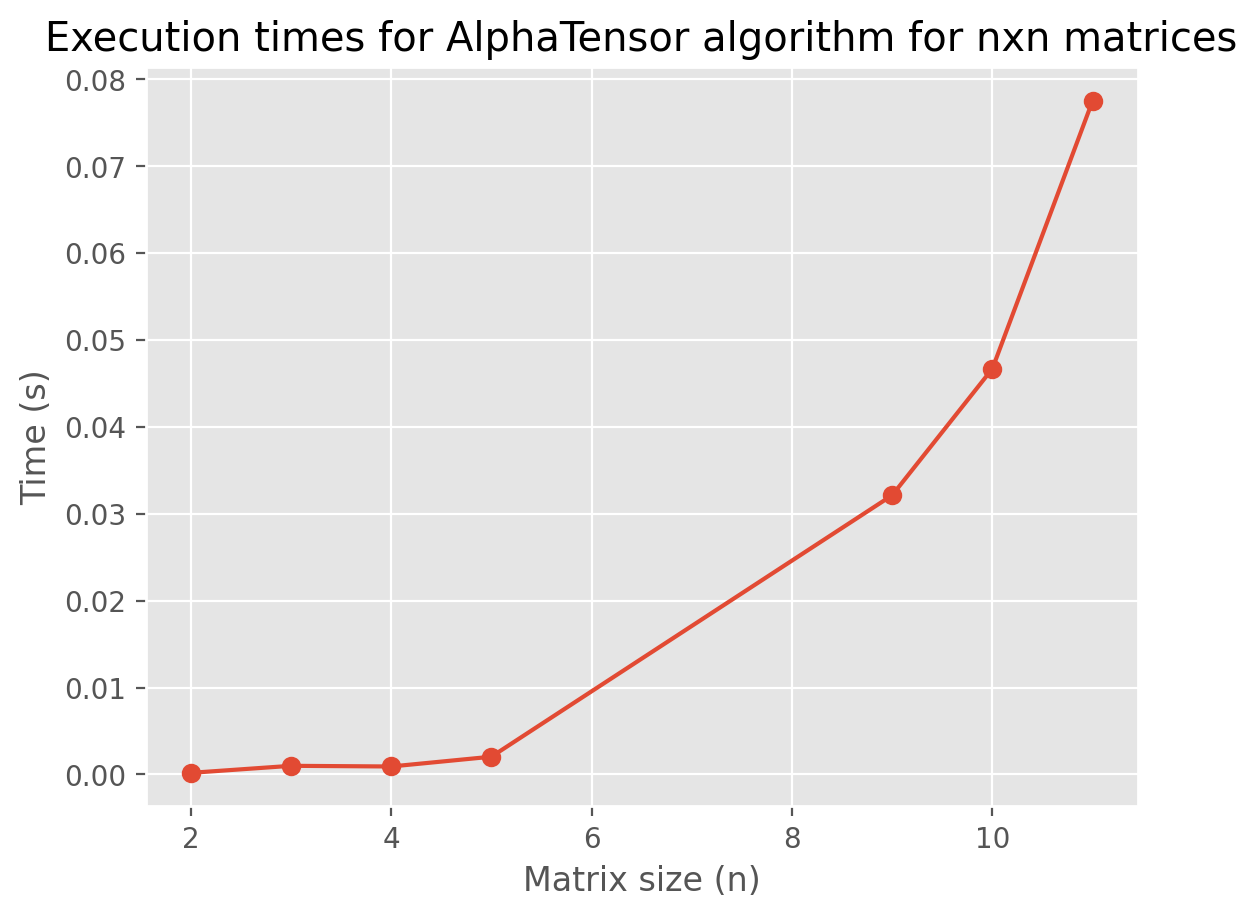

In [107]:
test_matrices_alpha_shape = get_test_matrices_for_alpha()
plot_execution_times_alpha(test_matrices_alpha_shape)

### Liczba operacji zmienno-przecinkowych

In [108]:
def plot_flops_alpha(test_matrices):
    flops = []
    sizes = []
    for A, B in test_matrices:
        if A.shape[0] == A.shape[1] == B.shape[1]:
            n = A.shape[0]
            f = factorizations[str(n)+','+str(n)+','+str(n)][0].shape[-1]
            flops.append(f)
            sizes.append(A.shape[0])
    plt.title("Number of floating-point operations for AlphaTensor algorithm for nxn matrices")
    plt.xlabel("Matrix size (n)")
    plt.ylabel("Floating-point operations number")
    plt.plot(sizes ,flops, '-o')
    plt.show()

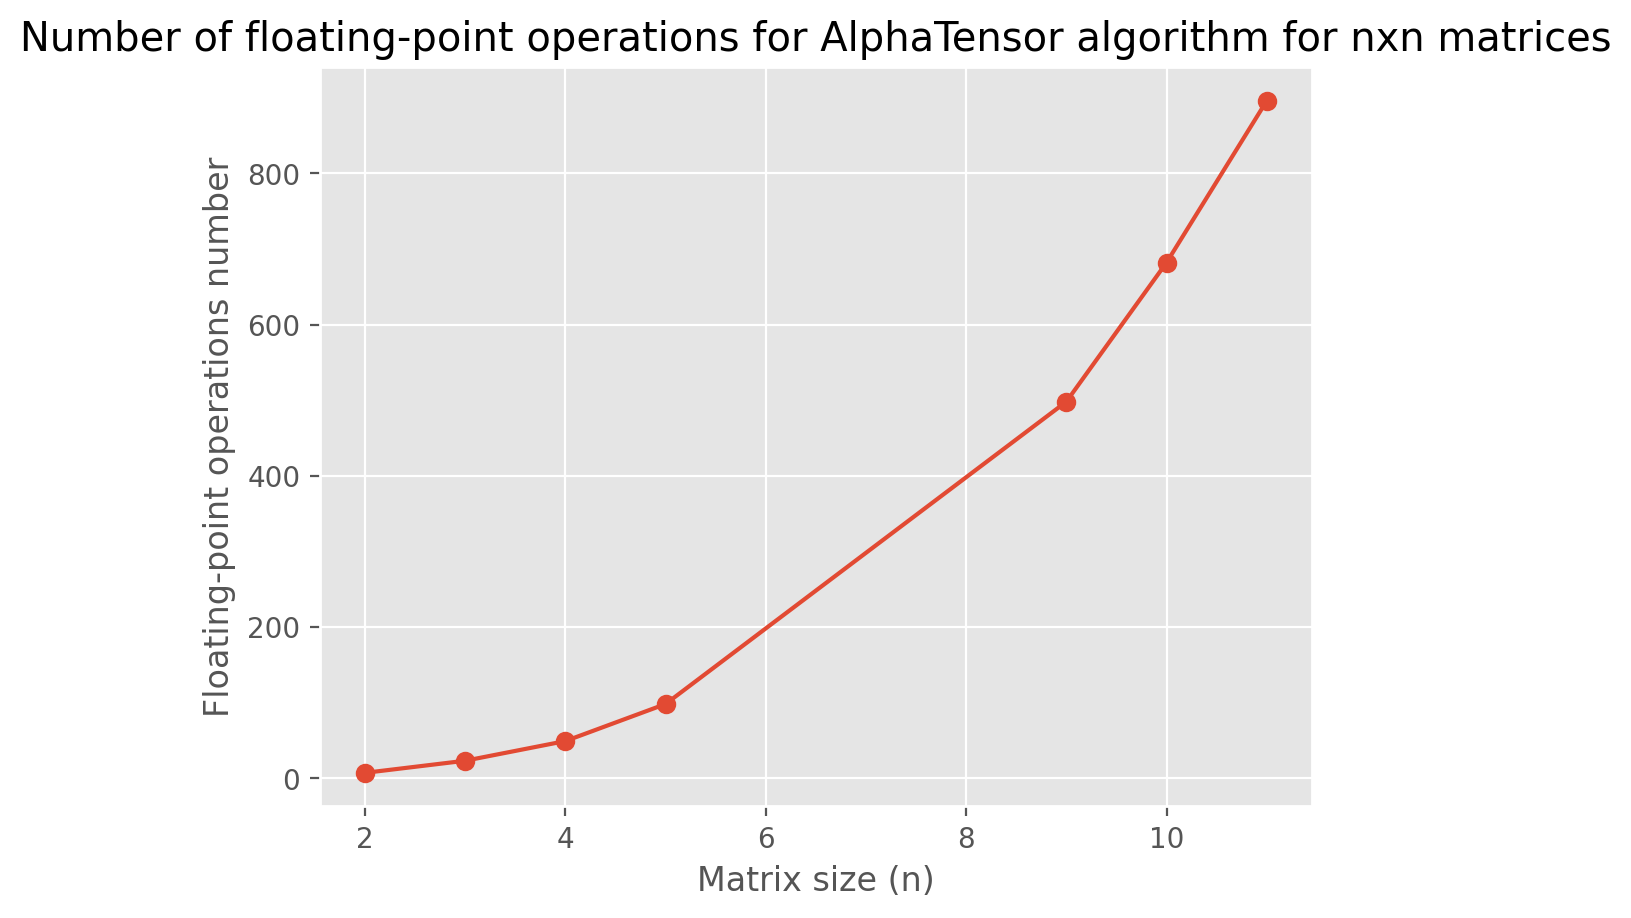

In [109]:
plot_flops_alpha(test_matrices_alpha_shape)

## Analiza złożoności algorytmu znalezionego przez AlphaTensor



Znalezione przez model dekompozycje pozwalają na wykonywanie mnożenia macierzy wykorzystująć tyle samo lub w niektórych przypadkach mniej mnożeń niż znane wcześniej algorytmy. Znając dekompozycje tensora $T$ na $R$ faktorów jesteśmy w stanie podzielić macierz dowolnego rozmiaru na na bloki których mnożenie odpowiada tensorowi $T$ i wykonać mnożenie rekurencyjnie.
W szczególności dla macierzy rozmiary $N \times N$ złożoność algorytmu wyniesie $O(N^{log_2(R)})$.

### Porównanie wyników zaimplementowanych algorytmów do mnożenia macierzy w środowisku MATLAB 

In [110]:
A = np.array([[0.44463534, 0.9474778, 0.54545892, 0.57620165],
              [0.33393432, 0.8630225, 0.90831119, 0.46819474],
              [0.41153919, 0.04239725, 0.48348421, 0.4384131],
              [0.07256337, 0.21993483, 0.30498917, 0.70466294]])


#Iloczyn A * A  obliczony w środowisku matlab.
res_ml = np.array([[0.780384796073647, 1.388829543530391, 1.542591038376598, 1.344968023544786],
                   [0.844451271144279, 1.202685417513368, 1.547988890792185, 1.324611107730802],
                   [0.427928196666931, 0.543434738583803, 0.630455847520753, 0.777879005045794],
                   [0.282355740212941, 0.426471514995844, 0.601721617707874, 0.775044570567925]])

#BINET
m = binet(A, A)[0]
print("Equal?", np.allclose(m, res_ml))

#STRASSEN
m = strassen(A, A)[0]
print("Equal?", np.allclose(m, res_ml))

#AlphaTensor
m = alphatensor_matrix_mul(A, A)[0]
print("Equal?", np.allclose(m, res_ml))

Equal? True
Equal? True
Equal? True


## Wnioski

Na podstawie przeprowadzonych testów, w których działanie zaimplementowanych przez nas algorytmów zostało porównane z mnożeniem macierzy z biblioteki Numpy oraz ze środowiskiem Matlab, możemy stwierdzić że nasze implementaje działają poprawnie. 

Jak możemy zauważyć, algorytm Strassena działa zdecydowanie szybciej niż algorytm Binet'a. Pomimo, że liczba dodawań wzrosła dla algorytmu Strassena, to liczba mnożeń zmniejszyła się o jeden, co znacząco wpłynęło na czas wykonywania algorytmu. 

Algorytmy znalezione przez AlphaTensor dla pewnych rozmiarów macierzy potrafią wykonać mnożenie wykorzystując mniej operacji zmiennoprzecinowych niż algorytm Strassena, jednak w naszych testach ograniczyliśmy sie do testowania mnożenia macierzy dla których faktoryzacja tensora $T$ jest znana i podana wprost (https://github.com/google-deepmind/alphatensor). Powoduje to, że porównanie algorytmów jest utrudnione, teoretyczna analiza złożoności pokazuje jednak, że wykorzystując algorytmy znalezione przez AlphaTensor można wykonać mnożenie macierzy z lepszą złożonością obliczeniową niż wykorzystując algorytm Strassena.